<a href="https://colab.research.google.com/github/negilbabu/Customer-Purchase-Prediction-ML-/blob/dev/Customer_Purchase_Prediction(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up Git Repo

In [1]:
!apt-get update
!apt-get install git

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [62.5 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,560 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/univ

In [2]:
!git clone https://github.com/negilbabu/Customer-Purchase-Prediction-ML-.git

Cloning into 'Customer-Purchase-Prediction-ML-'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 32 (delta 11), reused 7 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 2.85 MiB | 8.03 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [3]:
%cd Customer-Purchase-Prediction-ML-/

/content/Customer-Purchase-Prediction-ML-


In [4]:
!git checkout dev

Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'


In [5]:
!git status

On branch dev
Your branch is up to date with 'origin/dev'.

nothing to commit, working tree clean


Set Up Kaggle

In [ ]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"negskaggle","key":"1a17f3b8301c1c5fb030b61f1eea0db4"}'}

In [ ]:
# !mkdir -p ~/.kaggle?

In [ ]:
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets list -s "predict-customer-purchase-behavior-dataset"

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/predict-customer-purchase-behavior-dataset           🛍️ Predict Customer Purchase Behavior Dataset        35KB  2024-06-19 02:48:24           3624         60  1.0              
rajeshrampure/black-friday-sale                                     Black Friday Sale                                     5MB  2022-12-24 09:37:49           8923         94  1.0              
fahmidachowdhury/customer-segmentation-data-for-marketing-analysis  Customer Segmentation Data for Marketing Analysis    16KB  2024-06-28 15:58:29           3990         62  0.9411765        
rabieelkharoua/predict-conversion-in-dig

In [ ]:
# !kaggle datasets download -d rabieelkharoua/predict-customer-purchase-behavior-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
predict-customer-purchase-behavior-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# !unzip predict-customer-purchase-behavior-dataset.zip

Archive:  predict-customer-purchase-behavior-dataset.zip
replace customer_purchase_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: customer_purchase_data.csv  


Importing necessory Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv("/content/Customer-Purchase-Prediction-ML-/customer_purchase_data.csv")

In [8]:
print(df)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
df.describe()

Age       Gender   AnnualIncome  NumberOfPurchases  \
count  1500.000000  1500.000000    1500.000000        1500.000000   
mean     44.298667     0.504667   84249.164338          10.420000   
std      15.537259     0.500145   37629.493078           5.887391   
min      18.000000     0.000000   20001.512518           0.000000   
25%      31.000000     0.000000   53028.979155           5.000000   
50%      45.000000     1.000000   83699.581476          11.000000   
75%      57.000000     1.000000  117167.772858          15.000000   
max      70.000000     1.000000  149785.176481          20.000000   

       ProductCategory  TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  \
count      1500.000000         1500.000000     1500.000000       1500.000000   
mean          2.012667           30.469040        0.326667          2.555333   
std           1.428005           16.984392        0.469151          1.705152   
min           0.000000            1.037023        0.000000          0.000000   
25%           1.000000           16.156700        0.000000          1.000000   
50%           2.000000           30.939516        0.000000          3.000000   
75%           3.000000           44.369863        1.000000          4.000000   
max           4.000000           59.991105        1.000000          5.000000   

       PurchaseStatus  
count      1500.00000  
mean          0.43200  
std           0.49552  
min           0.00000  
25%           0.00000  
50%           0.00000  
75%           1.00000  
max           1.00000

In [ ]:
df.head()

Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0               1  
3           46.167059               0                 4               1  
4           19.823592               0                 0               1

In [ ]:
df.shape

(1500, 9)

Trim whitespaces from column name

In [9]:
df.columns = df.columns.str.strip()

Checking for any null values and if exists, removes the null values

In [16]:
print("Checking for null values")
count = df.isnull().sum()
for col, null_count in count.items():
    if null_count > 0:
        print(f"Column '{col}' has {null_count} null values. Removing null values...")
        df = df.dropna(subset=[col])
    else:
        print(f"Column '{col}' has no null values.")


Checking for null values
Column 'Age' has no null values.
Column 'Gender' has no null values.
Column 'AnnualIncome' has no null values.
Column 'NumberOfPurchases' has no null values.
Column 'ProductCategory' has no null values.
Column 'TimeSpentOnWebsite' has no null values.
Column 'LoyaltyProgram' has no null values.
Column 'DiscountsAvailed' has no null values.
Column 'PurchaseStatus' has no null values.


Checking for any Duplication and removes if there exists any duplicates

In [21]:
print("Checking for duplicated rows:")
duplicated_rows = df.duplicated()
print(f"Total duplicated rows: {duplicated_rows.sum()}")

if duplicated_rows.any():
    df_removed_duplicates = df.drop_duplicates()
    print("Total rows after removing duplicates", df_removed_duplicates.shape)



Checking for duplicated rows:
Total duplicated rows: 112
Total rows after removing duplicates (1388, 9)


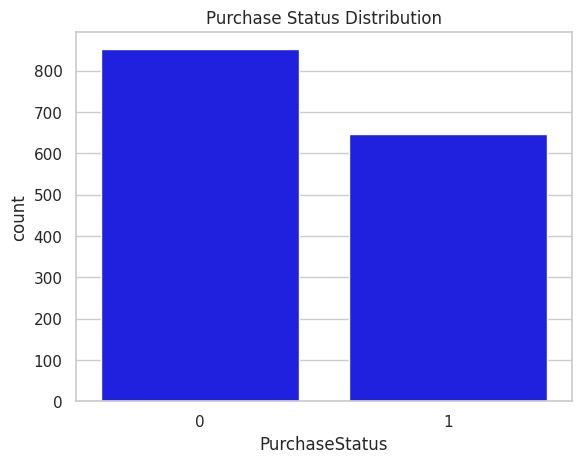

In [26]:
sns.set(style="whitegrid")

sns.countplot(x='PurchaseStatus', data=df, color="blue")
plt.title('Purchase Status Distribution')
plt.show()

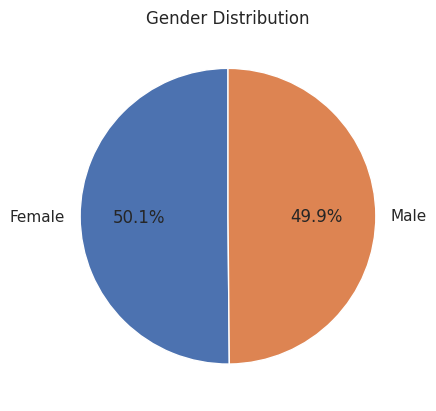

In [27]:
# Mapping gender values to labels without affecting the original DataFrame
gender_mapping = {0: 'Male', 1: 'Female'}
df_mapped = df_removed_duplicates.copy()
df_mapped['Gender'] = df_mapped['Gender'].map(gender_mapping)

# Generating the pie chart
gender_counts = df_mapped['Gender'].value_counts()  # Use the mapped DataFrame here
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()




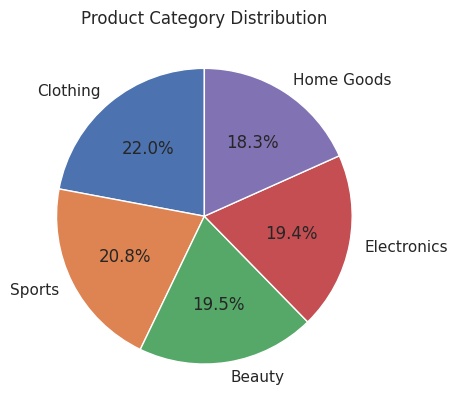

In [28]:
# Mapping product category values to their corresponding names
category_mapping = {0: 'Electronics', 1: 'Clothing', 2: 'Home Goods', 3: 'Beauty', 4: 'Sports'}
df_category_mapped = df_removed_duplicates.copy()
df_category_mapped['ProductCategory'] = df_category_mapped['ProductCategory'].map(category_mapping)

category_counts = df_category_mapped['ProductCategory'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Category Distribution')
plt.show()


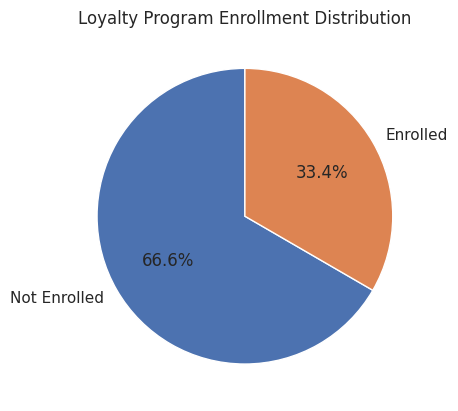

In [29]:
# Mapping loyalty program values without affecting the original DataFrame
loyalty_mapping = {0: 'Not Enrolled', 1: 'Enrolled'}
df_mapped = df_removed_duplicates.copy()  # Create a temporary copy
df_mapped['LoyaltyProgram'] = df_mapped['LoyaltyProgram'].map(loyalty_mapping)

# Generating the pie chart for loyalty program distribution
loyalty_counts = df_mapped['LoyaltyProgram'].value_counts()
plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loyalty Program Enrollment Distribution')
plt.show()


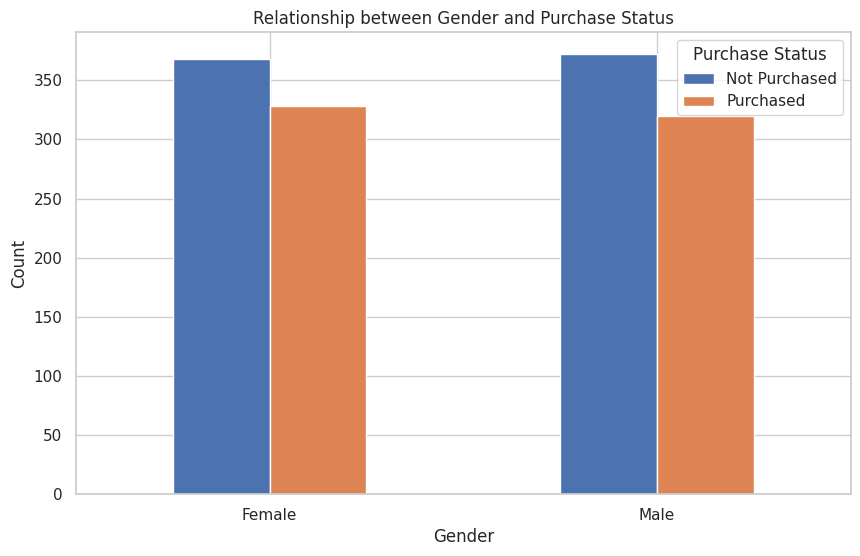

In [30]:
gender_mapping = {0: 'Male', 1: 'Female'}
df_temp = df_removed_duplicates.copy()
df_temp['Gender'] = df_temp['Gender'].map(gender_mapping)
gender_purchase_relation = df_temp.groupby(['Gender', 'PurchaseStatus'])['PurchaseStatus'].count().unstack()

gender_purchase_relation.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Relationship between Gender and Purchase Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Purchase Status', labels=['Not Purchased', 'Purchased'])
plt.show()

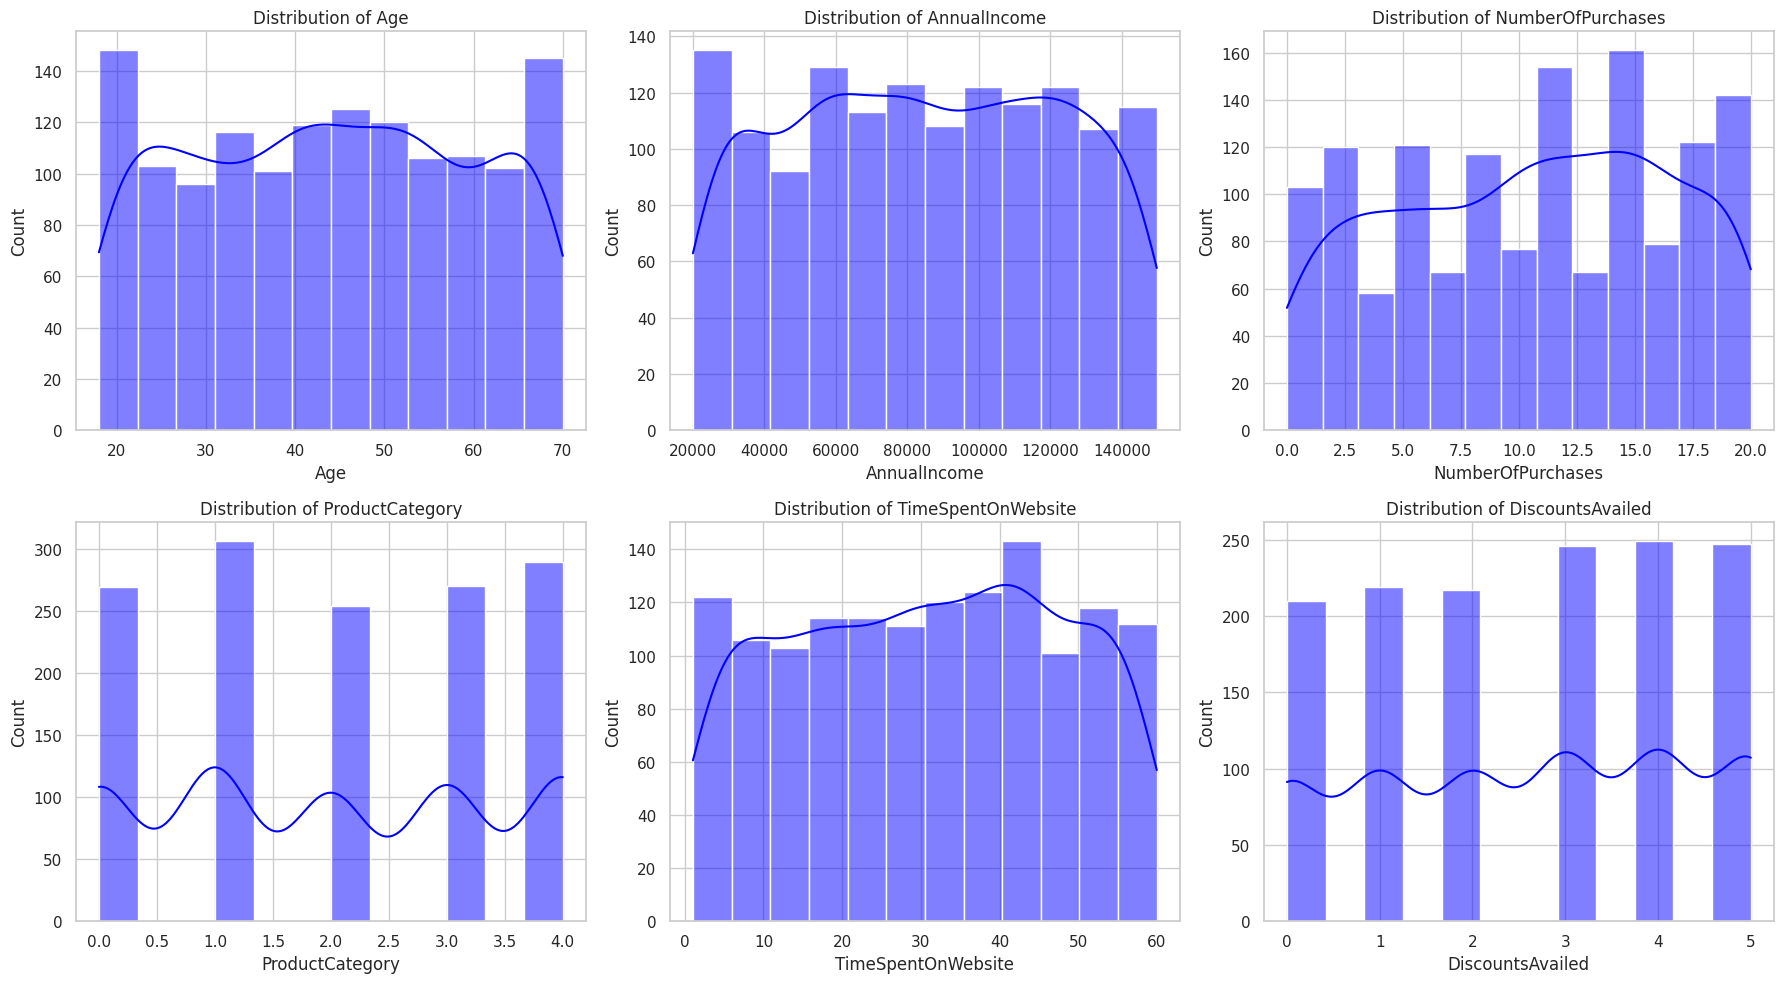

In [31]:
sns.set(style="whitegrid")

features_to_plot = ['Age', 'AnnualIncome','NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'DiscountsAvailed']
num_features = len(features_to_plot)
num_rows = (num_features + 2) // 3
num_cols = min(num_features, 3)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
  sns.histplot(df_removed_duplicates[feature], kde=True, ax=axes[i], color="blue")
  axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

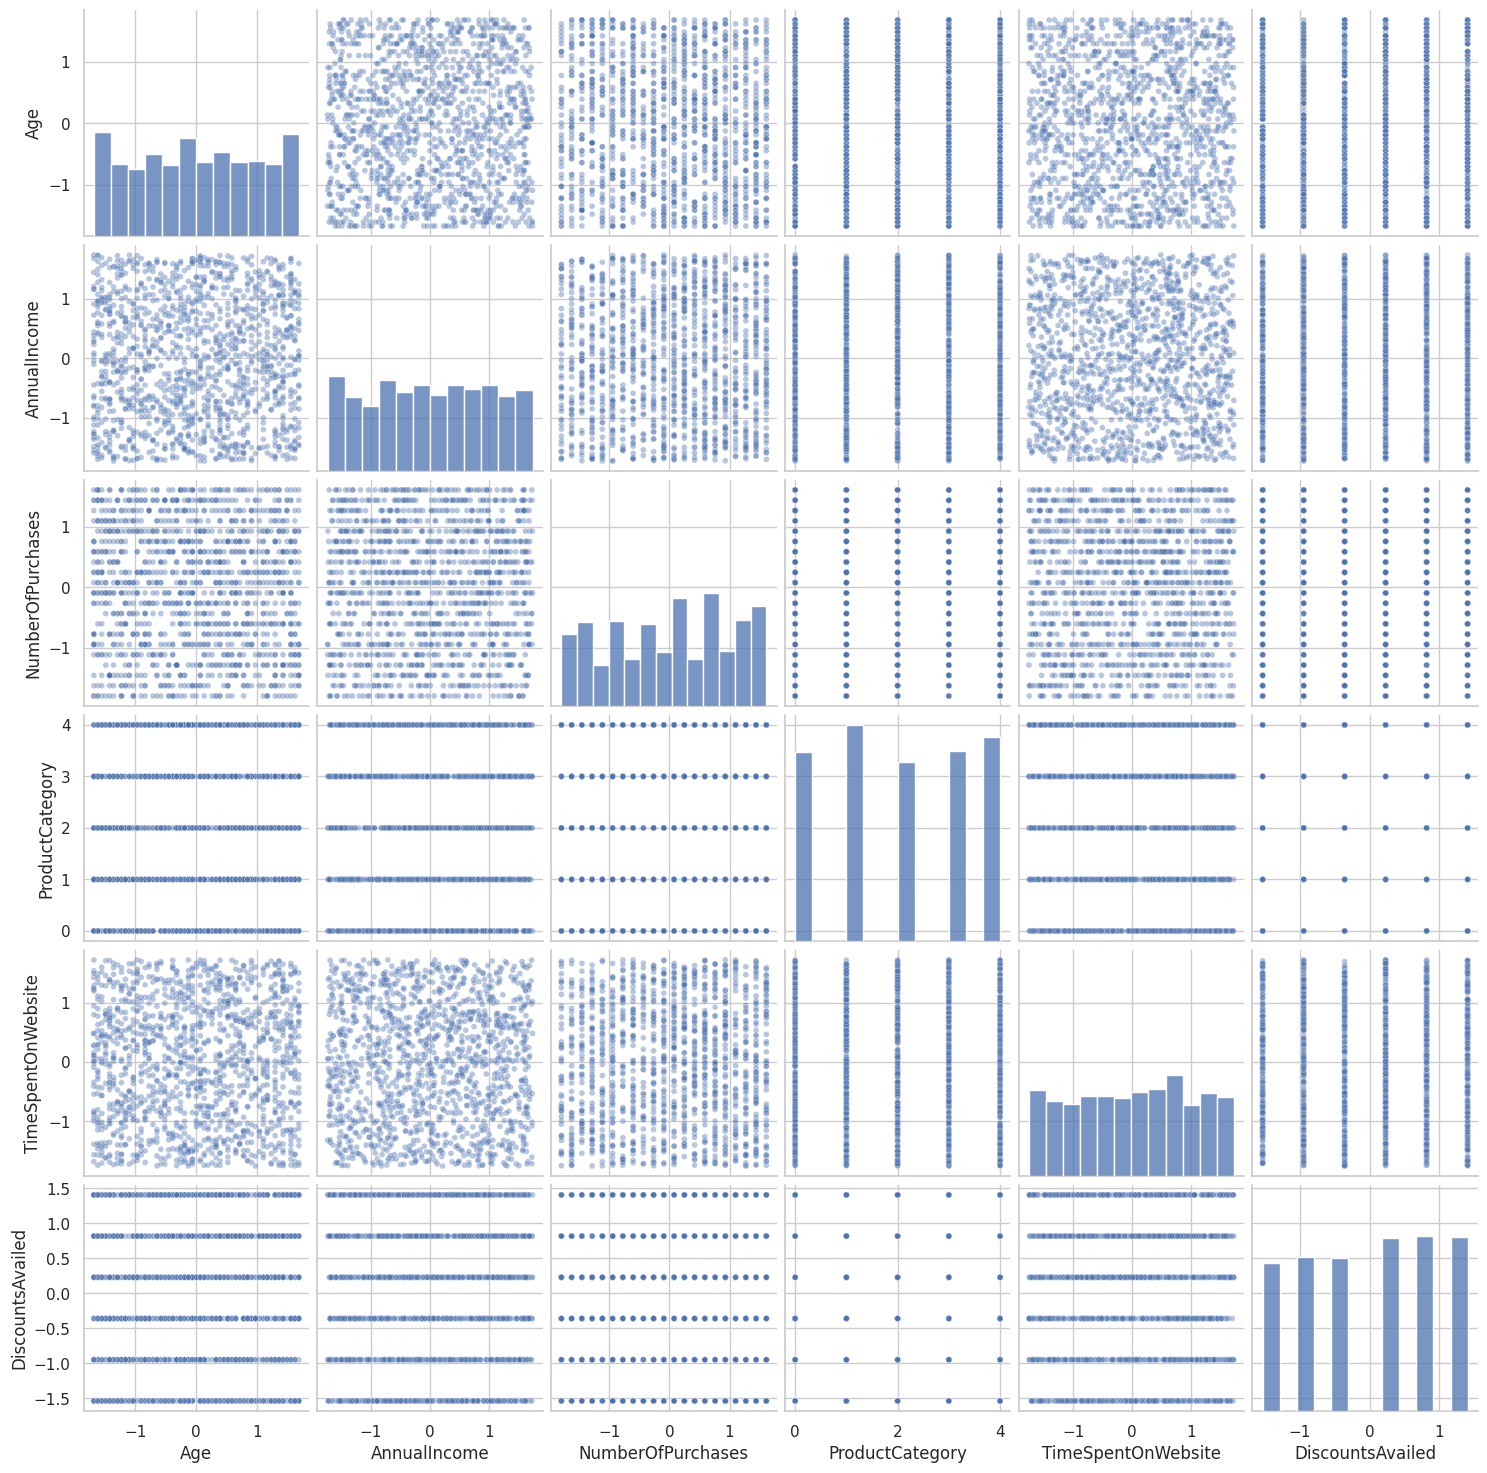

In [64]:
sns.pairplot(df_removed_duplicates[['Age', 'AnnualIncome','NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'DiscountsAvailed']],
             plot_kws={'alpha':0.4, 'size':5},
             );

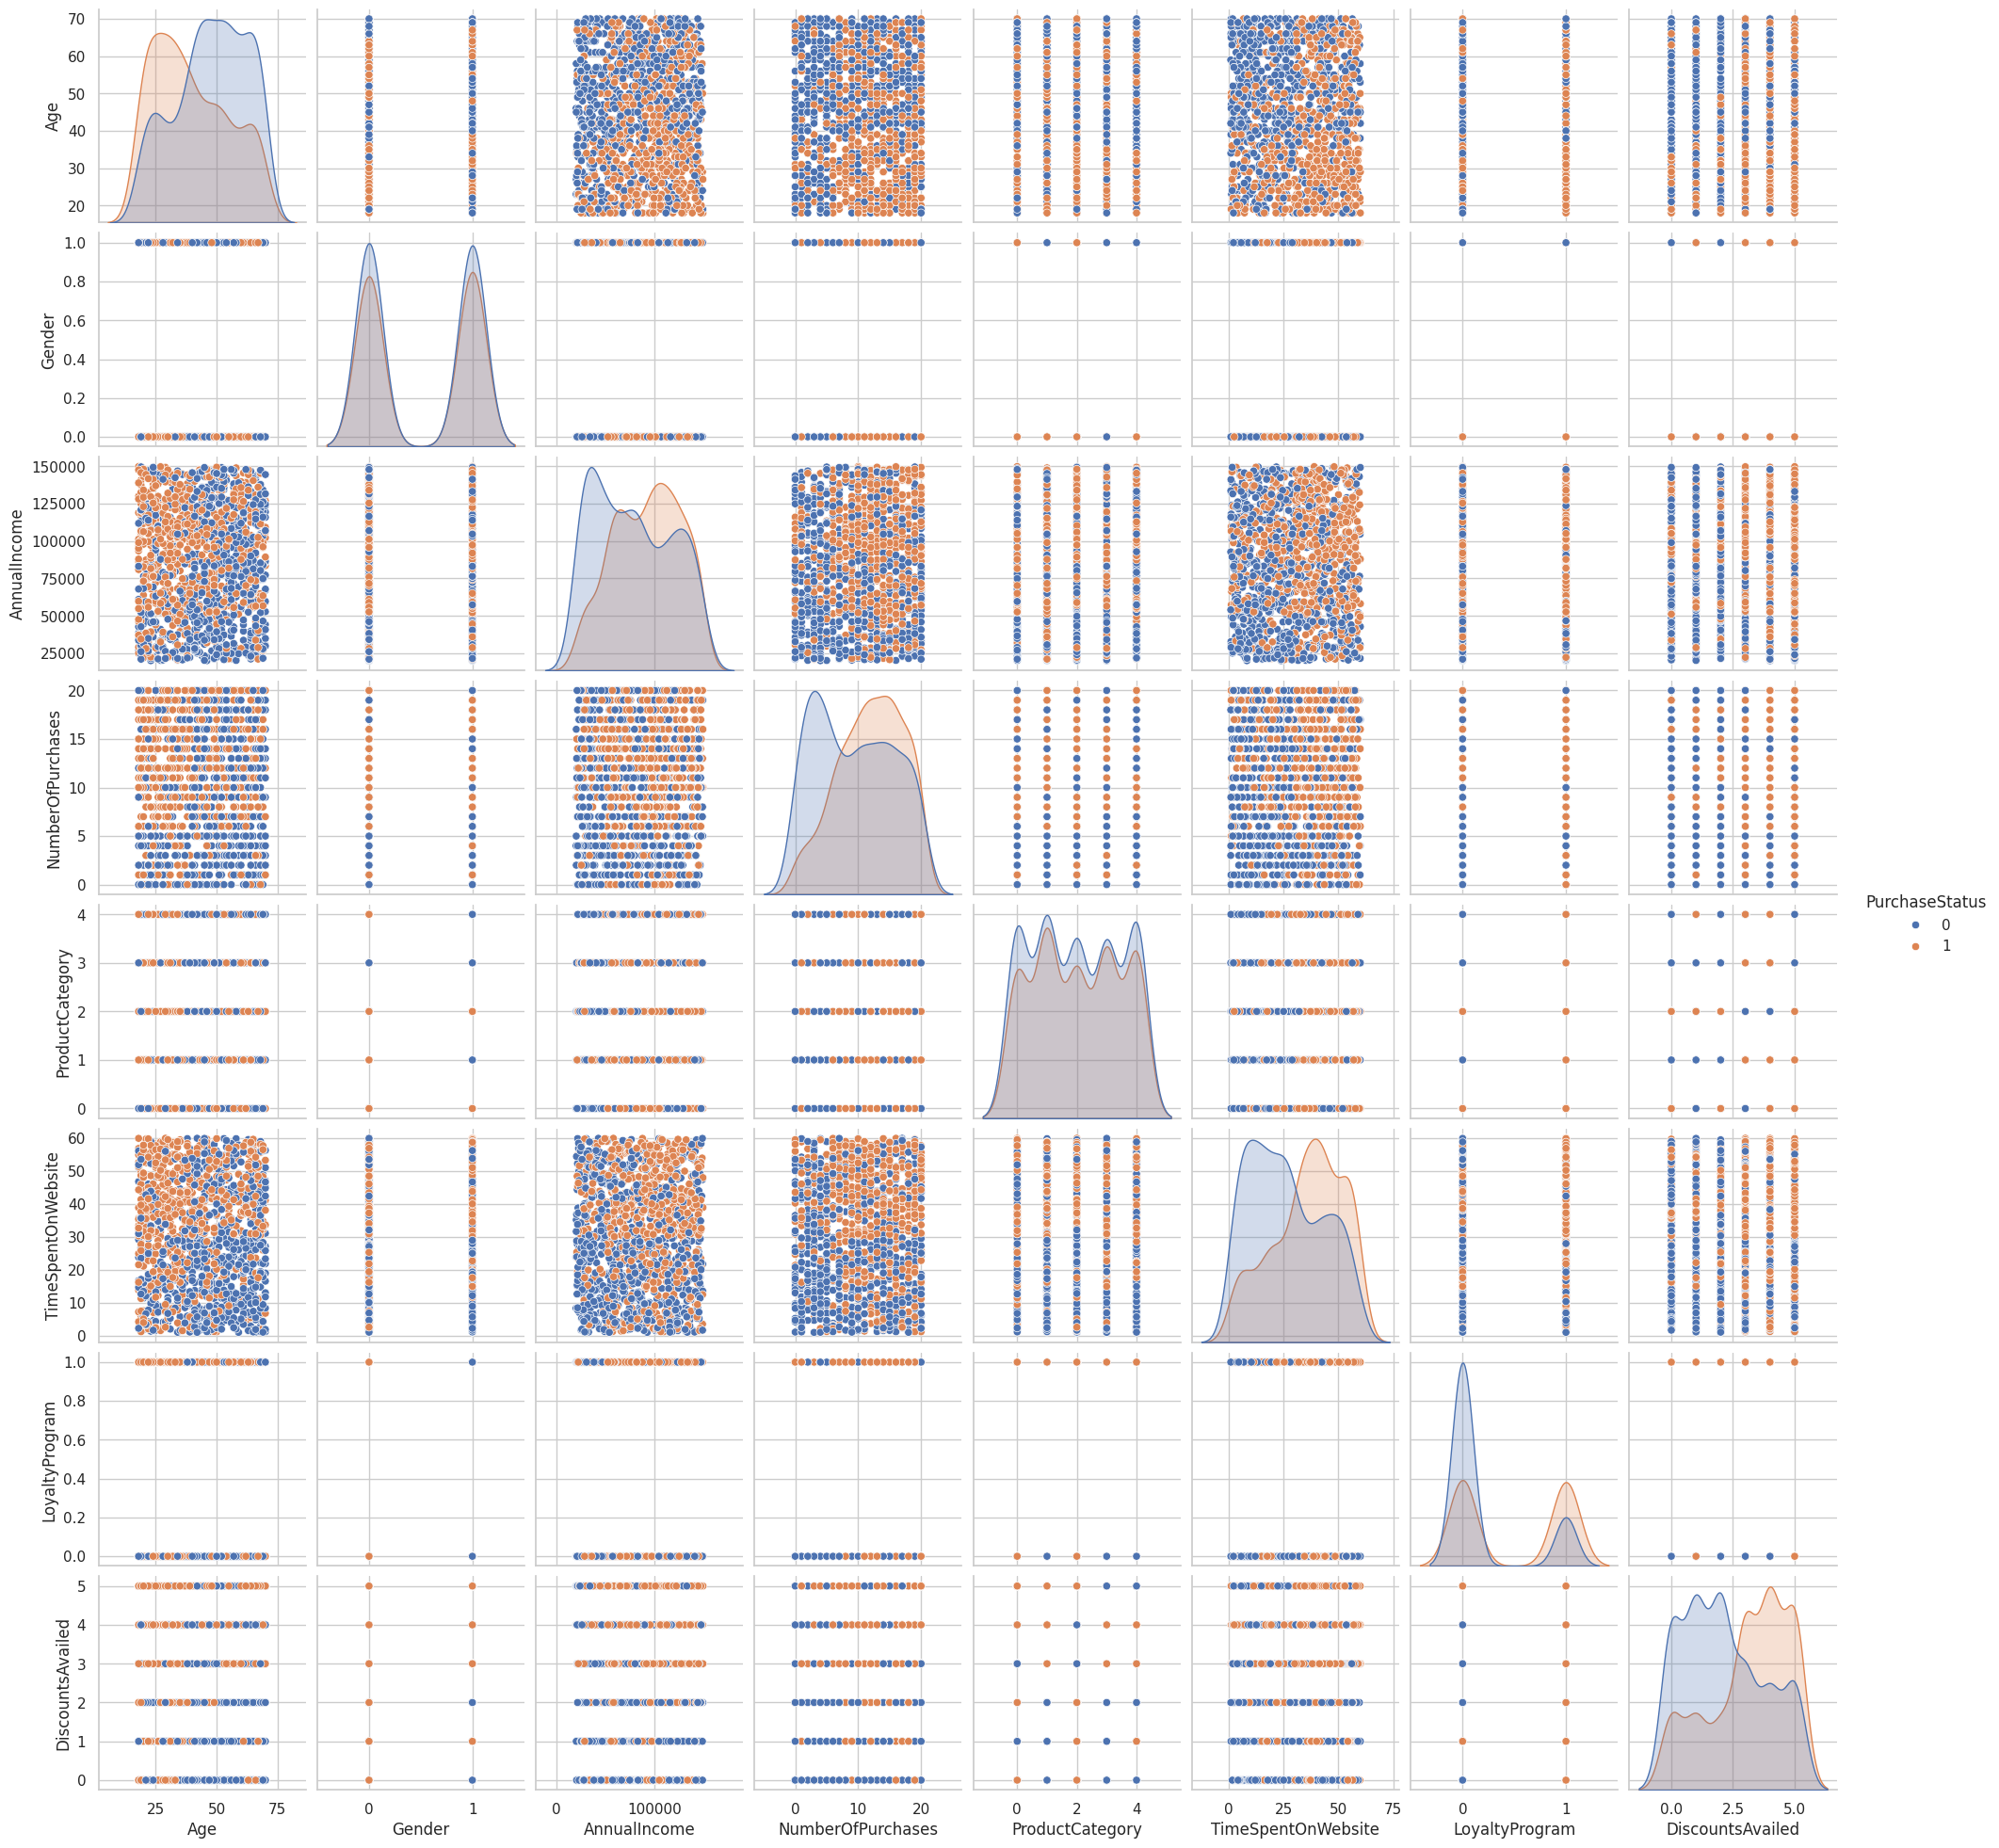

In [32]:
sns.pairplot(df_removed_duplicates, hue='PurchaseStatus')
plt.show()

Analyzing the relationship between features and target variable

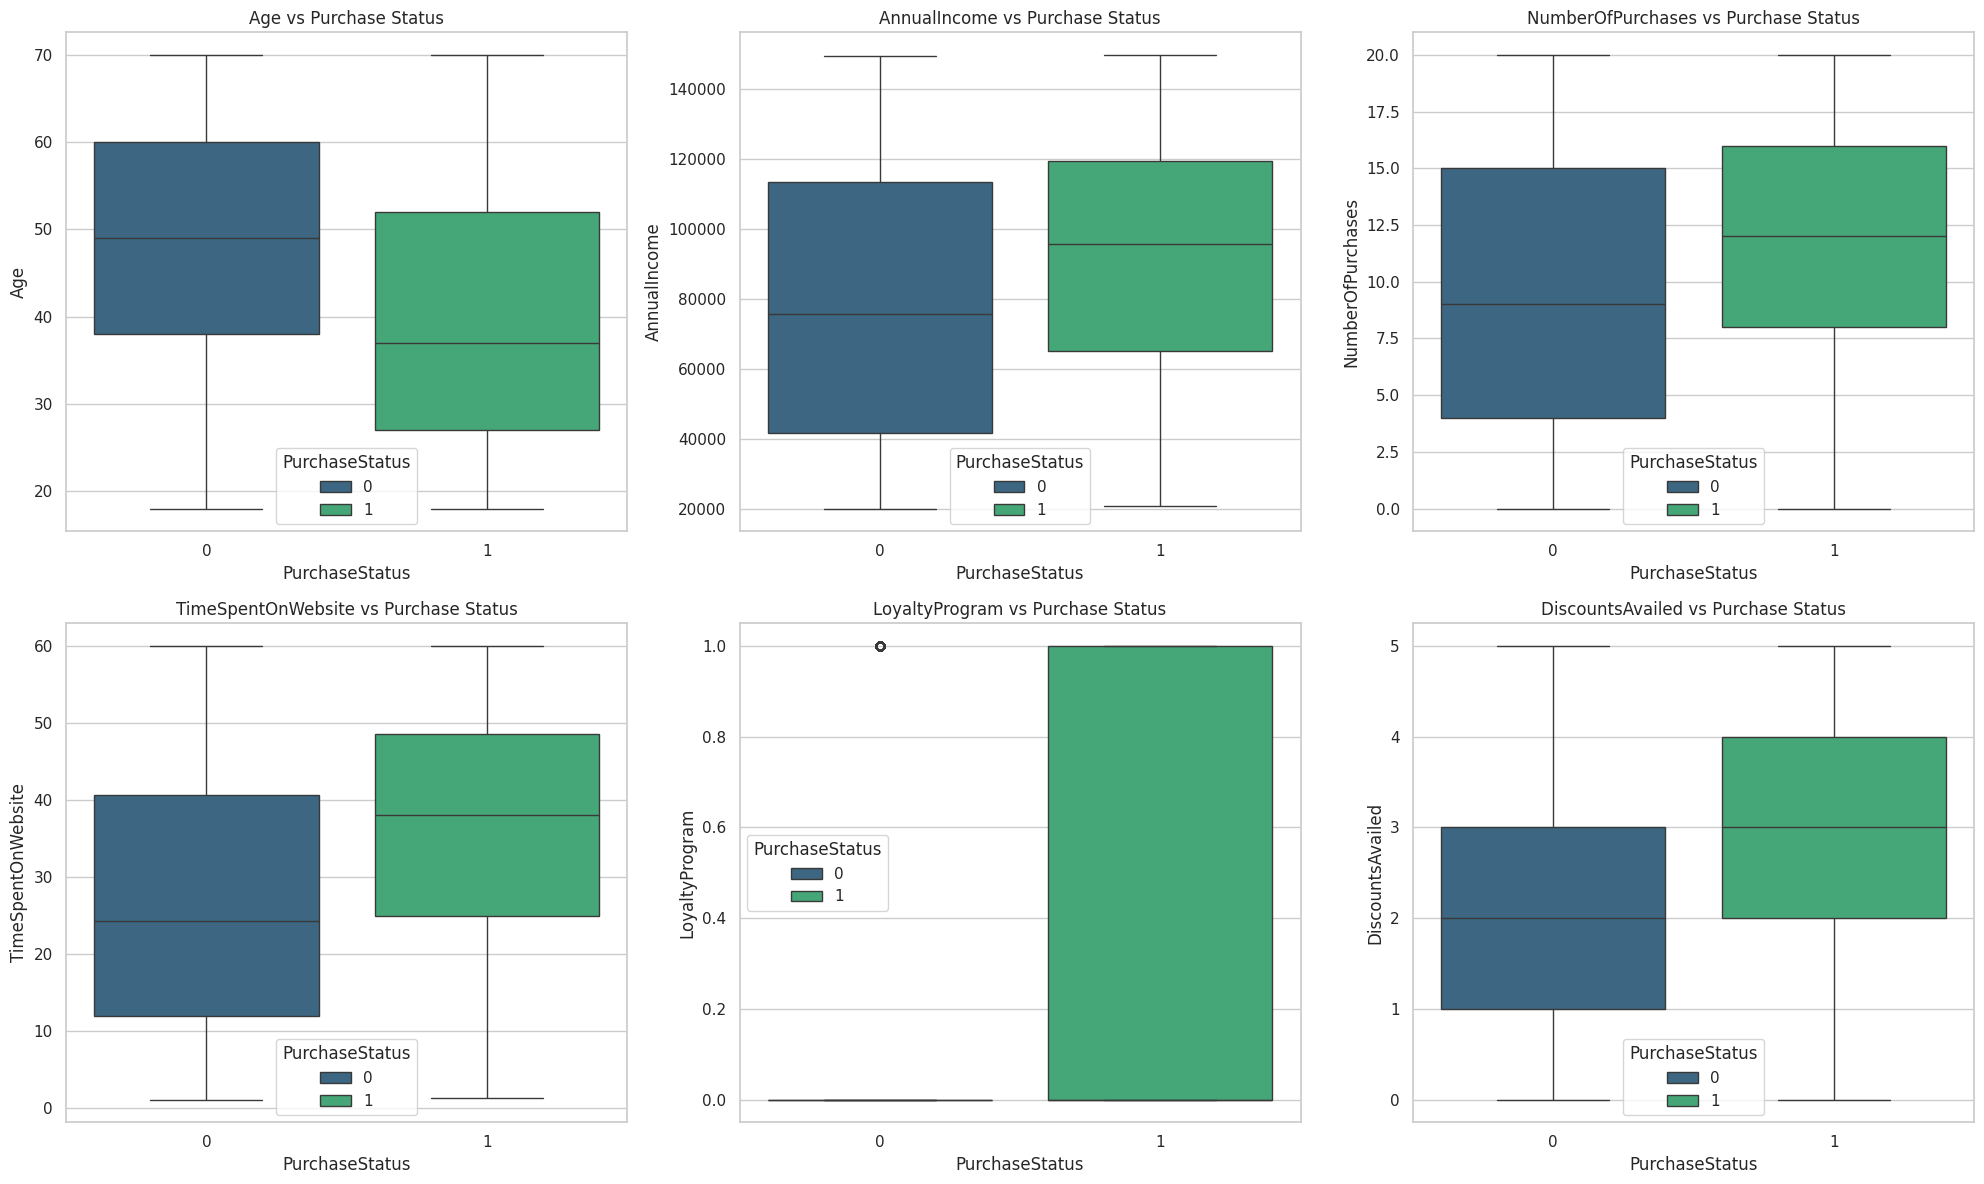

In [34]:
features_to_plot = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i, feature in enumerate(features_to_plot):
    row, col = divmod(i, 3)
    sns.boxplot(
        x="PurchaseStatus",
        y=feature,
        data=df_removed_duplicates,
        ax=axes[row, col],
        palette="viridis",
        hue="PurchaseStatus",
        dodge=False
    )
    axes[row, col].set_title(f"{feature} vs Purchase Status")

for i in range(len(features_to_plot), axes.size):
    axes.flatten()[i].set_visible(False)

plt.tight_layout()
plt.show()


Correlation Heatmap

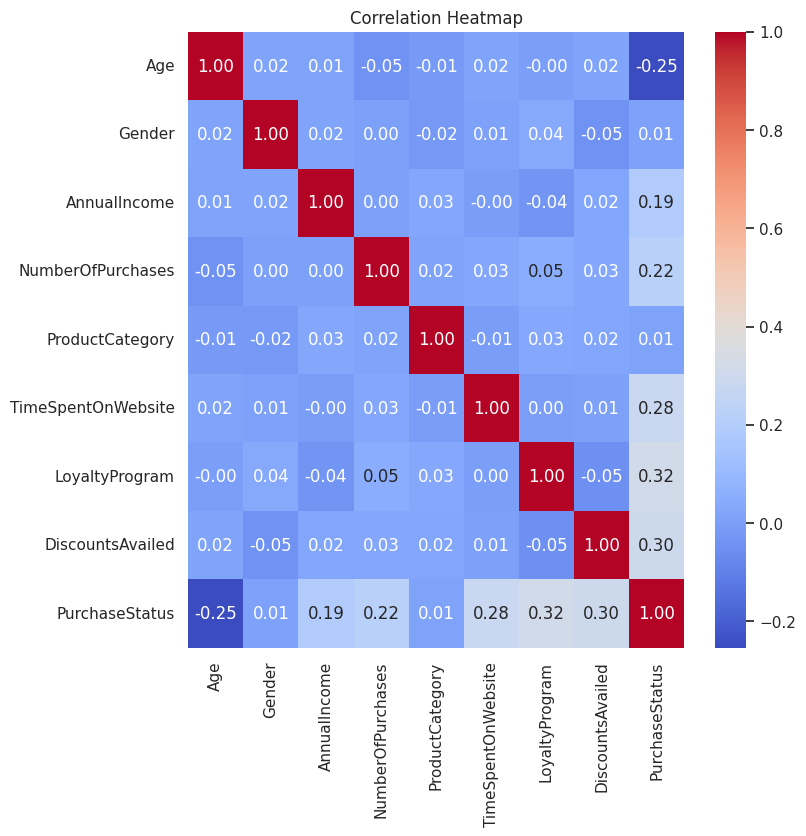

In [35]:
plt.figure(figsize=(8, 8))
correlation_matrix = df_removed_duplicates.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Splitting the data


In [36]:
x = df_removed_duplicates.drop(columns=['PurchaseStatus'])
y = df_removed_duplicates['PurchaseStatus']

In [37]:
x.head()

Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  
0           30.568601               0                 5  
1           38.240097               0                 5  
2           31.633212               1                 0  
3           46.167059               0                 4  
4           19.823592               0                 0

Feature Scaling

In [38]:
numeric_scalable_features =['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']
scaler = StandardScaler()
df_removed_duplicates[numeric_scalable_features] = scaler.fit_transform(df_removed_duplicates[numeric_scalable_features])

df_removed_duplicates.info(), df_removed_duplicates.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   float64
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   float64
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   float64
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 108.4 KB


<ipython-input-38-78b2bd17b522>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed_duplicates[numeric_scalable_features] = scaler.fit_transform(df_removed_duplicates[numeric_scalable_features])


(None,
         Age  Gender  AnnualIncome  NumberOfPurchases  ProductCategory  \
 0 -0.254456       1     -0.495070          -0.434443                0   
 1 -1.546283       1     -1.628648          -1.116191                2   
 2 -1.094144       1      1.149081           0.076869                2   
 3 -1.287918       1      1.414947           1.440365                3   
 4 -0.835778       1      0.389098           1.440365                1   
 
    TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
 0           -0.010544               0          1.406691               1  
 1            0.441498               0          1.406691               0  
 2            0.052188               1         -1.535574               1  
 3            0.908594               0          0.818238               1  
 4           -0.643694               0         -1.535574               1  )

Splitting the data into training and test data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [62]:
y_pred = model.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.7769784172661871


In [65]:
model = LogisticRegression(max_iter=10000, random_state=17)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=17)

In [66]:
y_pred = model.predict(X_test)

In [67]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8309352517985612


In [68]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

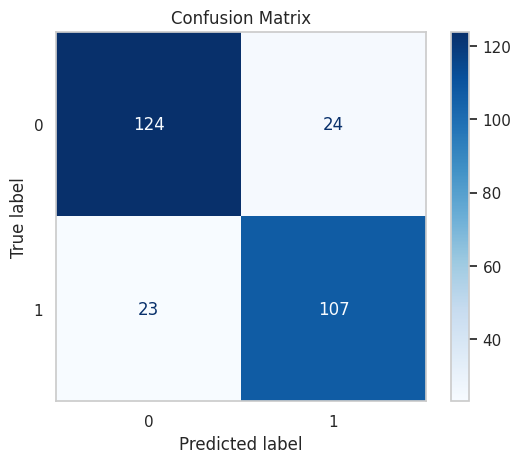

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format='')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [46]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
y_pred = model.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.9172661870503597
